In [2]:
# 데이터 분석에 필요한 라이브러리를 Import합니다.

# pandas
import pandas as pd
from pandas import Series, DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [45]:
# train용 파일과 test용 파일을 pandas로 호출합니다.
titanic_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

In [46]:
# 데이터 형태를 살펴봅니다.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
# pandas info()함수를 통햇 column별 데이터 개수 및 형식 등을 파악합니다.
titanic_df.info()
print "-------------------------"
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare   

In [48]:
# 데이터를 살펴보고 분석과 관련없다고 판단되는 'PassengerId', 'Name', 'Ticket' 항목을 제거해줍니다.
# test용 데이터도 training용 데이터와 동일한 조건을 부여하기 위해 같은 작업을 해줍니다.(이하 언급 생략)
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [49]:
# 전체적인 데이터를 살펴보았으면 각각의 개별 column과 target value('Survived')와의 관계를 분석합니다.
# 데이터 Column에 대한 설명은 'https://www.kaggle.com/c/titanic/data'를 참조하시면 됩니다.

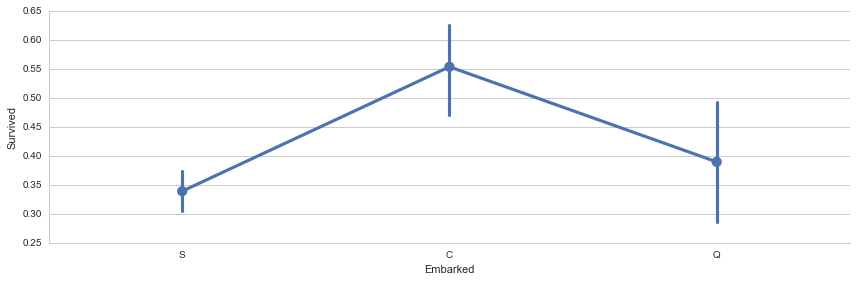

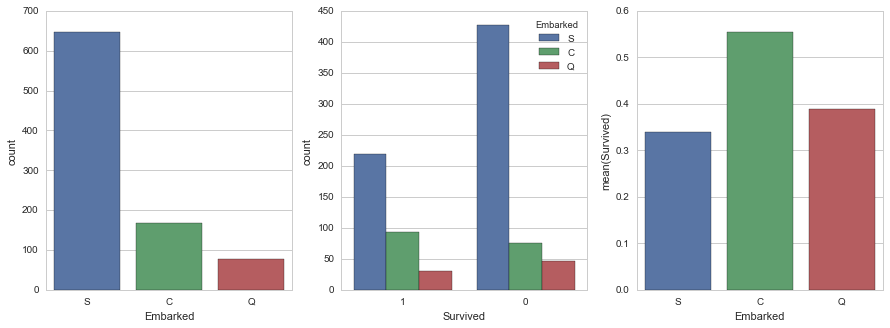

In [50]:
# Embarked 

# 'Embarked'의 총 데이터수 889개로 2개가 부족한 상황입니다.
#  이 부족한 부분을 'Embarked'의 최빈값인 'S'로 채워줍니다. 
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

# 데이터 분포를 보기위해 plot를 그려줍니다.
sns.factorplot('Embarked', 'Survived', data=titanic_df, size = 4, aspect=3)
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize = (15, 5))

sns.countplot(x="Embarked", data=titanic_df, ax=axis1)
sns.countplot(x="Survived", hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

# "Embarked"의 변수별로 target값에 대한 평균값을 살펴보기 위해 "Embarked"로 group by해줍니다.
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x="Embarked", y='Survived', data=embark_perc, order=['S', 'C', 'Q'], ax=axis3)

# plot를 보면 "Embarked" coulmn의 변수 "C"와 "Q"는 target값과 연관성이 있어보이지만 "S"변수는 관계가 적어보입니다.
# 그렇기 때문에 "S" 변수를 제거해줍니다.
# 데이터 분석을 위해서는 변수 "S"를 제거해주고 string형태의 데이터를 dummy변수로 변환해주면 되지만 
# 여기서 논리적으로 "Embarked"와 target value인 "Survived"와의 관계가 적어보이므로 "Embarked" column을 제거해줍니다.
embark_dummies_titanic = pd.get_dummies(titanic_df["Embarked"])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test = pd.get_dummies(test_df["Embarked"])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

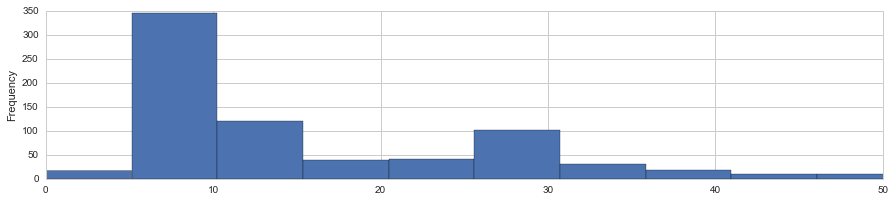

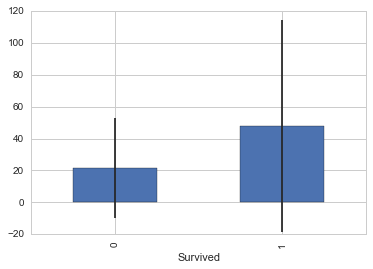

In [51]:
# "Fare"

# "Fare" column은 test 데이터에만 missing value가 존재하므로 이를 중간값(median)으롤 채워줍니다.
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# float 형태의 데이터를 int형태로 바꿔줍니다.
titanic_df["Fare"] = titanic_df["Fare"].astype(int)
test_df["Fare"] = test_df["Fare"].astype(int)

# target value에 대한 "Fare" column 변수들의 빈도수 및 평균, 표준편차를 알아봅시다.
fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived     = titanic_df["Fare"][titanic_df["Survived"] == 1]
 
average_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare     = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot을 그려줍니다.
titanic_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

average_fare.index.names = std_fare.index.names = ["Survived"]
average_fare.plot(yerr=std_fare,kind='bar',legend=False)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


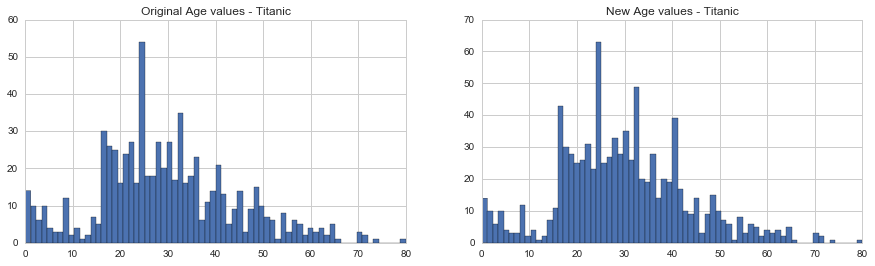

In [52]:
# "Age" column 전처리
# 'Age' column의 데이터 수는 714개로 다른 column에 비해 많이 부족해 보입니다.
# 일단 nan value를 임의로 값으로 채워주고 초기 데이터 분포와 얼마나 달라지는지 살펴봅니다.

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# traing데이터와 testing 데이터에 있는 "Age" column의 평균, 표준편차 그리고 NAN values의 수를 계산합니다.
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# numpy를 이용하여 (mean - std) & (mean + std) 사이 값을 랜덤하게 만듭니다.()
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# original Age values의 plot을 그려줍니다.(randomn values로 채운 후와 비교하기 위해서)
# original Age values의 null values를 모두 제거해주고 int형태로 바꿔줍니다.
titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)


# "Age" column의 NaN values를 위에서 만들어 놓은 random values로 채워줍니다. 
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# float 형태를 int 형태로 바꿔줍니다.
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)
        

# randomn values 채운 "Age" coulmn을 plot으로 보여줍니다. 
titanic_df['Age'].hist(bins=70, ax=axis2)
# test_df['Age'].hist(bins=70, ax=axis4)

# plot을 살펴보면 nan values를 randomn values 채우기 전과 후의 차이점이 거의 없는것을 알수있습니다.
# 이를 통해서 'Age' column을 제거하지 않고 데이터를 분석에 활용할수 있게 되었습니다. 

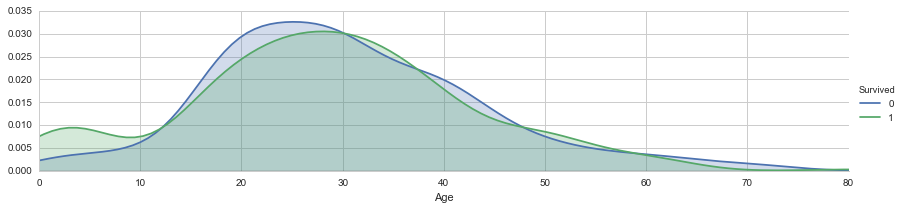

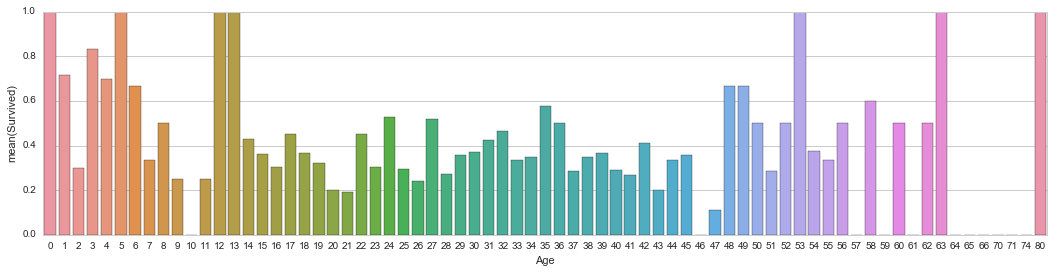

In [53]:
# "Age" column 분석

# "Age" column의 변수들을 target value인 "Survivevd"에 대해서 어떠한 분포를 보이는지 알아보기 위해 
#  seaborn 라이브러리의 kdeplot를 그려줍니다.
facet = sns.FacetGrid(titanic_df, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim =(0, titanic_df['Age'].max()))
facet.add_legend()

# 연령대별로 "Survived" 변수에 대한 평균값을 그려줍니다.
# 나이가 어리거나 많을수록 "Survived" 변수에 대한 평균값이 높은 것을 알수있습니다.
fig, axis1 = plt.subplots(1, 1, figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
sns.barplot(x="Age", y="Survived", data=average_age)

In [54]:
# Cabin

# "Cabin" column은 missing value가 너무 많이 존재하므로 column 자체를 제거해줍니다.

titanic_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)


In [55]:
# Family

# "Parch" 항목과 "SibSp" 항목은 배우자와 자녀가 동승했는지 여부를 알수있는 column으로 
# "Family" 항목으로 합쳐질 수 있는 특성을 가지고 있습니다.
# 비슷한 항목에 속하는 값들은 개별적으로 분석하기 보다 하나의 값으로 합쳐주는 것이 좋습니다.
# 여기에서는 "Family" 항목으로 "Survived" 와의 관계를 살펴보기 위해 "Parch" 항목과 "SibSp" 항목을 합쳐줍니다.
# 이전의 두 column을 합쳐서 가족의 유무를 판단할 수 있는 'Family' coulumn을 만들었습니다.
titanic_df['Family'] = titanic_df['Parch'] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0]  = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

test_df['Family'] =  test_df['Parch'] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

# "Family" 항목으로 합쳐준 뒤에는 "Parch" 항목과 "SibSp" 항목을 제거해줍니다.
titanic_df = titanic_df.drop(['SibSp', 'Parch'], axis = 1)
test_df = test_df.drop(['SibSp', 'Parch'], axis = 1)



[<matplotlib.text.Text at 0x110491550>, <matplotlib.text.Text at 0x111f1ea50>]

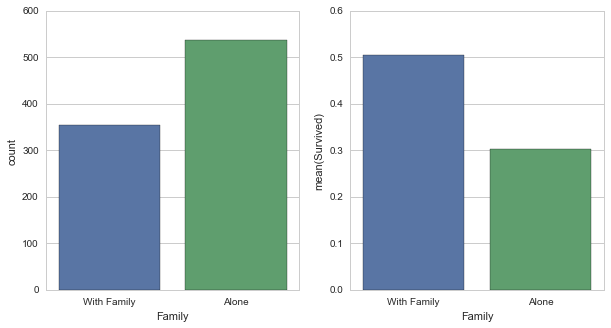

In [56]:
# Family 

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=titanic_df, order=[1,0], ax=axis1)

# 가족구성원의 유무에 따라 "Survived" 변수에 대한 평균값을 plot으로 보여줍니다.
family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)


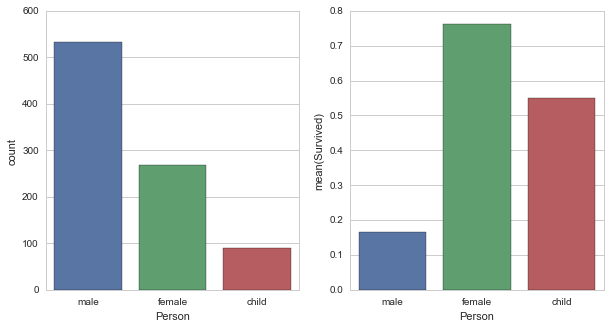

In [57]:
# Person("Sex", "Age" column 합치기)

# 위의 "Age" column에서 나이에 따라서 변화가 있다는 것을 파악했으므로 "Sex", "Age" column을 합쳐서 "Person" column으로 새롭게 만듭니다.
# 변수를 child, male, female로 새롭게 나타내기 위하여 get_person함수를 만들어 사용합니다.
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

# "Person" column을 새롭게 만들었기 때문에 "Sex" column은 제거해 줍니다.
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

# "Person" column의 변수들을 dummy variables로 변환해주고 
# "male" 변수는 target vaule에 대하여 낮은 평균값을 가지고 있기 때문에 제거해줍니다.
# categorical values를 dummy value로 변화해주는 경우에는 변화된 변수들 간에 multi-correlation을 
# 가지게 되는 경우가 생기므로 target value에 대하여 가장 높거나 낮은 평균값을 가지는 변수를 제거해 주는 것이 좋습니다.
person_dummies_titanic  = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

titanic_df = titanic_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=titanic_df, ax=axis1)


# 각 변수들의 target value에 대한 평균값을 보여줍니다.
person_perc = titanic_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True) 

# femail과 child가 male에 비하여 살아남을 가능성 확실히 높았다는 것을 알 수 있습니다.

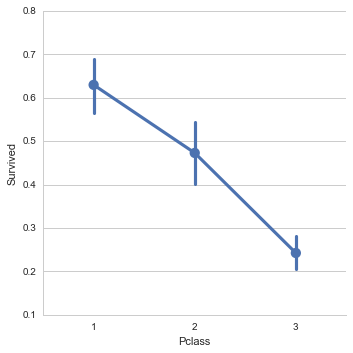

In [58]:
# Pclass

sns.factorplot('Pclass', 'Survived', order=[1,2,3], data=titanic_df, size=5)

# "Pclass" column의 변수들 categorical value를 가지고 있기 때문에 dummy values로 바꿔줍니다.
# 변환된 값 중 'Class3'은 target value에 대하여 가장 낮은 평균값을 가지고 있기 때문에 제거해 줍니다.
pclass_dummies_titanic = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class1', 'Class2', 'Class3']
pclass_dummies_titanic.drop(['Class3'], axis=1, inplace=True)

pclass_dummies_test = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class1', 'Class2', 'Class3']
pclass_dummies_test.drop(['Class3'], axis=1, inplace=True)

# 변환되기 전의 column값인 'Pclass'는 제거해 줍니다.
titanic_df.drop(['Pclass'], axis=1, inplace=True)
test_df.drop(['Pclass'], axis=1, inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df = test_df.join(pclass_dummies_test)

Preprocessing이 완료된 데이터를  Machine Learning model에 적용해봅니다.
이 노트북에서는 Data preprocessing 위주이기 때문에 기본적인 model fitting를 사용합니다.

In [59]:
# 먼저 Data preprocessing이 완료된 데이터를 training용, test용으로 정의해줍니다.
# 이후 각 모델에 적용해보고 predict score를 살펴봅니다.
X_train = titanic_df.drop("Survived", axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.copy()

In [60]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.81032547699214363

In [61]:
# Support Vector Machines

svc = SVC()

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

svc.score(X_train, Y_train)

0.856341189674523

In [62]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.9640852974186308

In [64]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

knn.score(X_train, Y_train)

0.8271604938271605

In [66]:
# Gaussian Naive Bayes

gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

gaussian.score(X_train, Y_train)

0.75869809203142535